# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

## What we are doing and why:

**What:** Clean and tidy our data so that it is ready for exploration, analysis and modeling

**Why:** Set ourselves up for certainty! 

    1) Ensure that our observations will be sound:
        Validity of statistical and human observations
    2) Ensure that we will not have computational errors:
        non numerical data cells, nulls/NaNs
    3) Protect against overfitting:
        Ensure that have a split data structure prior to drawing conclusions

In [ ]:
# ------------

## High level Roadmap:

#### **Input:** An aquired dataset (One Pandas Dataframe) ------> **Output:** Tidied and cleaned data split into Train,  Validate, and Test sets (Three Pandas Dataframes)

#### **Processes:** Summarize the data ---> Clean the data ---> Split the data

## Summarize

In [1]:
# imports
# numpy for vectorized operations
import numpy as np
# pandas for dataframe manipulation of tabular data
import pandas as pd
# matplotlib for visualizations
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire

In [2]:
# Grab our acquired dataset:

In [3]:
df = acquire.get_titanic_data()

Using cached csv


In [4]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# take a look at our data:

In [5]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
# takeaways from df head:
# survived is our target -- it is not a potential feature
# 
# passenger id is probably inadvisable to keep in
# pclass and class appear to be the same thing
# embark_town and embarked appear to be the same thing

In [7]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [9]:
# df.columns will give just the column names as strings
list(df.columns)

['passenger_id',
 'survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'deck',
 'embark_town',
 'alone']

In [11]:
numcols = [col for col in df.columns if df[col].dtype != 'O']

In [13]:
catcols = [col for col in df.columns if df[col].dtype == 'O']

In [20]:
# sanity check
df[numcols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   age           714 non-null    float64
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   alone         891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [24]:
# Describe our object columns:
for col in catcols:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print('-------')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('====================')

Column: sex
male      577
female    314
Name: sex, dtype: int64
-------
male      0.647587
female    0.352413
Name: sex, dtype: float64
Column: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
-------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
Column: class
Third     491
First     216
Second    184
Name: class, dtype: int64
-------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
Column: deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
-------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
Column: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
-------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


passenger_id


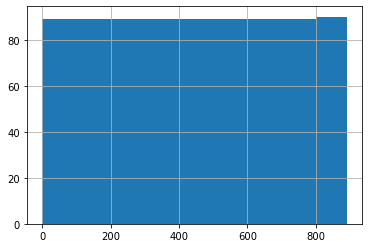

survived


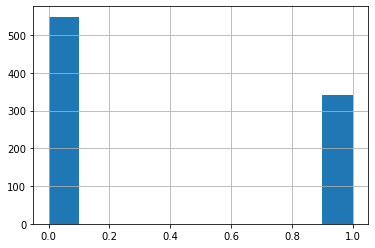

pclass


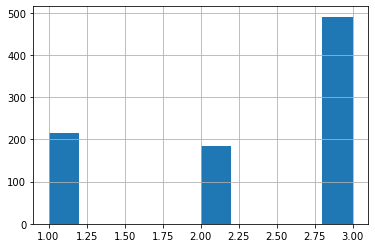

age


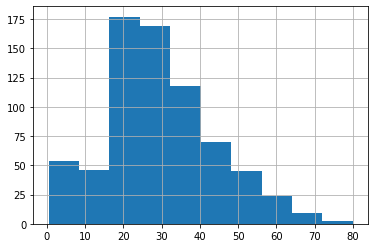

sibsp


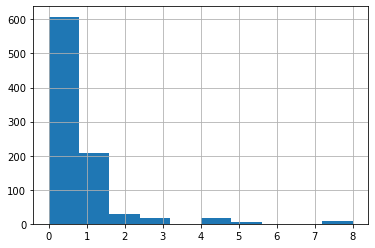

parch


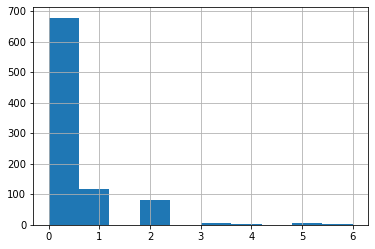

fare


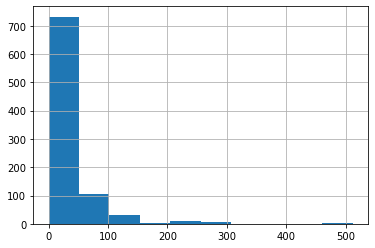

alone


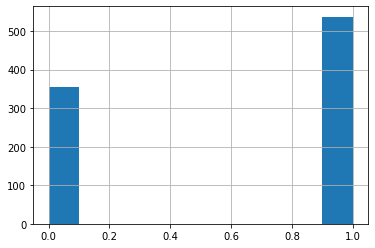

In [26]:
# describe numerical columns
for col in numcols:
    print(col)
    df[col].hist()
    plt.show()


In [ ]:
# missing values:

In [32]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

#### Gather our takeaways, i.e., what we are going to do when we clean:

1. embark looks to be the as embark_town
 - we will remove embarked, keep embark_town, because embark_town gives us richer information than embark while both are in string literal format

2. pclass looks to be the same as class
 - we will remove class, keep pclass, because pclass is already encoded and retains the same level of informational value

3. passenger_id is irrelevant, matches dataframe row index
 - we will remove passenger_id

4. We have too much information missing in deck
 - we will drop deck, as we have no way of reasonably imputing over 77% of the information at the moment

5. We have a large amount of missing information in Age
 - Age might be extremely valuable, but the proportion of missing informatoin at the time is too large for me to draw meaningful conclusions from without outside corroboration for missing values

6. I have two missing values in embark_town/embarked 
 - I will impute the two missing values in the dataframe

### Clean

In [33]:
# drop_duplicates...run just in case
df.drop_duplicates(inplace=True)

In [ ]:
# alternatively: df = df.drop_duplicates()


In [34]:
# see if anything was dropped
df.shape

(891, 13)

In [35]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [ ]:
# drop columns with too many missing to have any value right now
# drop columns that duplicate data


In [36]:
columns_to_drop = ['deck', 'age', 'embarked', 'class', 'passenger_id']

In [40]:
df = df.drop(columns = columns_to_drop)

KeyError: "['deck' 'age' 'embarked' 'class' 'passenger_id'] not found in axis"

We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below. Or we could use an imputer. We will demonstrate the imputer *after* the train-validate-test split. 

### Two different imputation methods:
#### 1: easier way: fillna()
#### 2: more robust way: use an imputer object
#### 3: extra fancy way: use a model to impute values

In [42]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
# using fillna:

In [44]:
df['embark_town'] = df.embark_town.fillna('Southampton')

In [49]:
df.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

In [ ]:
# dropped the columns that did not have enough information for us
# filled the values of our series with just a small amount of missing values
    # with the most frequent value 


### Encoding:
 - we have two options: simple encoding or one-hot encoding

One-Hot Encoding:

Start with: one column with categorical information:

Example: embark_town: Southampton, Queenstown, Cherbourg

Output of one-hot: Three columns: embark_Southampton, embark_Queenstown, embark_Cherbourg, all 0/1 binary values

In [50]:
# encoding steps:
# make a dataframe of dummy columns
# concat our dummies back into our original

dummy_df = pd.get_dummies(df[['sex', 'embark_town']],
                          dummy_na=False,
                         drop_first = [True, True])

In [51]:
dummy_df

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [52]:
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# rows, cols == r0ws, co1s

In [53]:
df

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [55]:
df = acquire.get_titanic_data()

Using cached csv


Create a function to perform these steps when we need to reproduce our dataset. 

In [58]:
'''
this is effectively just a multi
    line
            comment

'''

'\nthis is effectively just a multi\n    line\n            comment\n\n'

In [54]:
def clean_titanic_data(df):
    '''
    takes in a dataframe of the titanic dataset as it is acquired and returns a cleaned dataframe
    arguments: df: a pandas DataFrame with the expected feature names and columns
    return: clean_df: a dataframe with the cleaning operations performed on it
    '''
    # drop any duplicate rows
    df = df.drop_duplicates()
    # drop columns we want to remove
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    # fill missing values
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    # encode categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True,True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])

In [56]:
df_clean_v0 = clean_titanic_data(df)

In [57]:
df_clean_v0

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1,0,1
887,887,1,1,0,0,30.0000,1,0,0,1
888,888,0,3,1,2,23.4500,0,0,0,1
889,889,1,1,0,0,30.0000,1,1,0,0


## Train, Validate, Test Split

In [61]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 
train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df.survived,
                               random_state=1349)

In [62]:
train.shape

(712, 13)

In [63]:
test.shape

(179, 13)

In [65]:
train, validate = train_test_split(train,
                               train_size = 0.7,
                               stratify = train.survived,
                               random_state=1349)

In [66]:
# split on original dataframe for clarity of the imputer example:
train_ex, test_ex = train_test_split(acquire.get_titanic_data(),
                                    train_size = 0.7,
                               random_state=1349)

Using cached csv


In [67]:
train_ex

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
147,147,0,3,female,9.0,2,2,34.3750,S,Third,NaN,Southampton,0
199,199,0,2,female,24.0,0,0,13.0000,S,Second,NaN,Southampton,1
213,213,0,2,male,30.0,0,0,13.0000,S,Second,NaN,Southampton,1
553,553,1,3,male,22.0,0,0,7.2250,C,Third,NaN,Cherbourg,1
125,125,1,3,male,12.0,1,0,11.2417,C,Third,NaN,Cherbourg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,0,3,male,20.5,0,0,7.2500,S,Third,NaN,Southampton,1
166,166,1,1,female,NaN,0,1,55.0000,S,First,E,Southampton,0
676,676,0,3,male,24.5,0,0,8.0500,S,Third,NaN,Southampton,1
785,785,0,3,male,25.0,0,0,7.2500,S,Third,NaN,Southampton,1


## Option for Missing Values: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.  

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent'). 
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object. 
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

1. Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (`mean`, `median`, `most_frequent`). Essentially, this is creating the instructions and assigning them to a variable we will reference.  

In [68]:
# step one: make the thing
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

In [69]:
type(imputer)

sklearn.impute._base.SimpleImputer

2. `Fit` the imputer to the columns in the training df.  This means that the imputer will determine the `most_frequent` value, or other value depending on the `strategy` called, for each column.   

In [70]:
# step two: fit the thing
# fit *ONLY* on training set
imputer = imputer.fit(train[['embark_town']])

3. It will store that value in the imputer object to use upon calling `transform.` We will call `transform` on each of our samples to fill any missing values.  

In [71]:
train[['embark_town']] = imputer.transform(train[['embark_town']])
# validate[['embark_town']] = imputer.transform(validate[['embark_town']])
test[['embark_town']] = imputer.transform(test[['embark_town']])

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns. 

In [72]:
def impute_mode(train, validate, test):
    '''
    impute mode for embark_town
    '''
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

Blend the clean, split and impute functions into a single prep_data() function. 

In [73]:
def prep_titanic_data(df):
    '''
    takes in a dataframe of the titanic dataset as it is acquired and returns a cleaned dataframe
    arguments: df: a pandas DataFrame with the expected feature names and columns
    return: train, test, split: three dataframes with the cleaning operations performed on them
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id'])
    train, test = train_test_split(df, test_size=0.2, random_state=1349, stratify=df.survived)
    train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)
#     print(train.info())
#     return train, validate, test
    train, validate, test = impute_mode(train, validate, test)
    dummy_train = pd.get_dummies(train[['sex', 'embark_town']], drop_first=[True,True])
    dummy_validate = pd.get_dummies(validate[['sex', 'embark_town']], drop_first=[True,True])
    dummy_test = pd.get_dummies(test[['sex', 'embark_town']], drop_first=[True,True])
    train = pd.concat([train, dummy_train], axis=1)
    validate = pd.concat([validate, dummy_validate], axis=1)
    test = pd.concat([test, dummy_test], axis=1)
    train = train.drop(columns=['sex', 'embark_town'])
    validate = validate.drop(columns=['sex', 'embark_town'])
    test = test.drop(columns=['sex', 'embark_town'])
    return train, validate, test

In [75]:
# do my acquire step as scripted
df = acquire.get_titanic_data()
# do my prepare step as scripted
train, validate, test = prep_titanic_data(df)

Using cached csv


In [76]:
train

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1
...,...,...,...,...,...,...,...,...,...
735,0,3,0,0,16.1000,1,1,0,1
163,0,3,0,0,8.6625,1,1,0,1
770,0,3,0,0,9.5000,1,1,0,1
196,0,3,0,0,7.7500,1,1,1,0


In [77]:
train.shape, validate.shape, test.shape

((498, 9), (214, 9), (179, 9))

## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  